In [ ]:
#### Notebook: code_usage_examples_01.ipynb
#### This notebook uses the code from extreme_temp_identification.py, extreme_temp_utils.py and regions.py
#### to walk-through certain use cases of identifying heatwave for specified regions / areas-of-interest.

## Make available in the notebook, the code from accompanying python modules

In [3]:
%run extreme_temp_identification.py

In [2]:
%run regions.py

## Primary Objectives

The primary objectives of these set of code files is to:
1) Process the existing CMIP (netCDF) files to identify extreme temperature events like heat waves.
2) Store the results, again as .nc (netCDF) files.
3) Visualize and anlayze the reults
4) Generate images

## Getting to know the regions and the areas-of-interest

Before we begin, it helps to know that for the purpose of calc

In [31]:
reg = Regions()
reg.get_all_regions()

{1: {'region_id': 1,
  'region_name': 'North America',
  'top_lat': 84,
  'bottom_lat': 14,
  'left_lon': 190,
  'right_lon': 350,
  'may_to_oct_range': (200, 335),
  'img_url': 'https://nasanex30analysis.blob.core.windows.net/cmip6/images/Region_North_America.png'}}

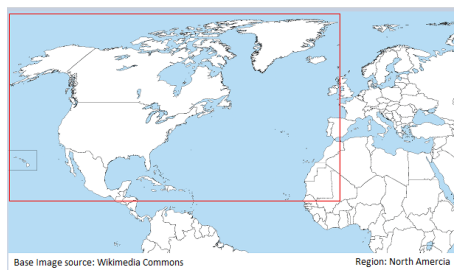

Region: 1 - North America, top_lat: 84, bottom_lat: 14, left_lon: 190, right_lon: 350


In [4]:
reg.show_region_by_ID(1)

In [32]:
reg.get_all_areas_of_interest_by_region_ID(1)

[{'aoi_id': 100,
  'area_of_interest': 'Mainland United States',
  'region_id': 1,
  'region_name': 'North America',
  'top_lat': 49,
  'bottom_lat': 25,
  'left_lon': 235,
  'right_lon': 293,
  'may_to_oct_range': (210, 335),
  'img_url': 'https://nasanex30analysis.blob.core.windows.net/cmip6/images/AoI_Mainland_US.png'},
 {'aoi_id': 101,
  'area_of_interest': 'Upper Northeast US',
  'region_id': 1,
  'region_name': 'North America',
  'top_lat': 46,
  'bottom_lat': 39,
  'left_lon': 280,
  'right_lon': 293,
  'may_to_oct_range': (210, 335),
  'img_url': 'https://nasanex30analysis.blob.core.windows.net/cmip6/images/AoI_Upper_Northeast_US.png'},
 {'aoi_id': 102,
  'area_of_interest': 'Lower Northeast US',
  'region_id': 1,
  'region_name': 'North America',
  'top_lat': 39,
  'bottom_lat': 37,
  'left_lon': 271,
  'right_lon': 286,
  'may_to_oct_range': (210, 335),
  'img_url': 'https://nasanex30analysis.blob.core.windows.net/cmip6/images/AoI_Lower_Northeast_US.png'},
 {'aoi_id': 103,
  

## Verify functions from Utility

### Load a 360 day file to see how the days are distributed

In [ ]:
filename = 'tasmax_day_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_2100.nc'
ds = get_xarray_dataset_from_netcdf_file(filename)
ds

<xarray.Dataset>
Dimensions:  (time: 360, lat: 600, lon: 1440)
Coordinates:
  * time     (time) object 2100-01-01 12:00:00 ... 2100-12-30 12:00:00
  * lat      (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes: (12/22)
    activity:              NEX-GDDP-CMIP6
    contact:               Dr. Rama Nemani: rama.nemani@nasa.gov, Dr. Bridget...
    Conventions:           CF-1.7
    creation_date:         2021-10-04T18:53:35.803609+00:00
    frequency:             day
    institution:           NASA Earth Exchange, NASA Ames Research Center, Mo...
    ...                    ...
    history:               2021-10-04T18:53:35.803609+00:00: install global a...
    disclaimer:            This data is considered provisional and subject to...
    external_variables:    areacella
    cmip6_source_id:       HadGEM3-GC31-LL
    cmip6_institution_id:  MOHC
    cmip6_license:         CC-BY-SA 4.0

In [ ]:
ds.time[59:62]

<xarray.DataArray 'time' (time: 3)>
array([cftime.Datetime360Day(2100, 2, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2100, 3, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2100, 3, 2, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2100-02-30 12:00:00 ... 2100-03-02 12:00:00
Attributes:
    axis:           T
    long_name:      time
    standard_name:  time

**It appears that each month has exactly 30 days, even February!**

## Create Average Temperature file

### Create Average Temperature file -- locally, no azure; maximum temperature

In [4]:
start_year = 1950
end_year = 1969

# without Azure so make those parameters None
# averages file in azure
use_sas_token = None
use_azure_url = None

# cmip files - raw data from NASA site
name_prefix = 'tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_'               # without the year at the end

# url_prefix: remeber to update to tasmax or tasmin; provide without the filename
cmip_files_url = 'https://ds.nccs.nasa.gov/thredds2/fileServer/AMES/NEX/GDDP-CMIP6/GISS-E2-1-G/historical/r1i1p1f2/tasmax/'

model_name = 'GISS_E2_1_G'  # with underscores, without _historical at the end

avg_ds = Interactive_GetAverageForRange(start_year, end_year, cmip=6, result_type='max'
                           , model_name = model_name,azure_url_prefix=use_azure_url, sas_token=use_sas_token
                           , cmip_files_url=cmip_files_url, cmip_file_name_prefix=name_prefix, from_azure=False
                           , save_back_in_azure=False, interactive=True)
avg_ds

Get Average and Record max temperature for the range 1950 to 1969, for CMIP6, model GISS_E2_1_G


Do you want to continue? y/n y


01:07:06 UTC: Get Averages file Avg_temp_max_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc
01:07:06 UTC: Available locally? No. Checking in Azure...
01:07:06 UTC: Azure url not provided, could not check there. Now preparing...
01:07:06 UTC: Arranging for all the component (10-year) files(s)
prepare_component_averages_files: filename:  Avg_temp_max_CMIP6_GISS_E2_1_G__10_yrs__1950_to_1959.nc
01:07:06 UTC: Component file 1 of 2 : --- 1950 to 1959 ----------
01:07:06 UTC: Component file available locally? No. Checking in Azure...
01:07:06 UTC: Component file also not in Azure, preparing...
1950
tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1950.nc
1951
tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1951.nc
1952
tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1952.nc
1953
tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1953.nc
1954
tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1954.nc
1955
tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1955.nc
1956
tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1956.

<xarray.Dataset>
Dimensions:    (lat: 600, lon: 1440, day: 365)
Coordinates:
  * lat        (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon        (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * day        (day) int64 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Data variables:
    tasmaxavg  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    tasmaxrec  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Dataset:           Average temperature CMIP6
    About dataset:     A dataset with average and record temparatures, across...
    Original values:   tasmax
    Data variables:    ['tasmaxavg', 'tasmaxrec']
    Data description:  Average and record maximum temperature, based on tasmax
    Range:             20 years
    Start year:        1950
    End year:          1969
    Years processed:   20
    Store as:          Avg_temp_max_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc

### verify average -- 1) max, no azure

In [12]:
#### A custom - verification function - Calculate average again by loading each temperature file, again.
#### based on the specifed lat, lon, day
#### and storing the results in an array -- yearly_temp
#### the downloaded file can be auto-deleted, after use, to clear local space

def get_one_day_temp_by_downloading_CMIP_files(ds_avgs, name_prefix, cmip_files_url, lat, lon, day, auto_delete = True):
    print('Temperature files for {} years, from {} to {}'.format(ds_avgs.attrs['Years processed'], ds_avgs.attrs['Start year'], ds_avgs.attrs['End year']))
    start_time = time.time()
    yearly_temp = []
    for yr in range(int(ds_avgs.attrs['Start year']), int(ds_avgs.attrs['End year']) + 1):
        filename = name_prefix + str(yr) + '.nc'
        file_url = os.path.join(cmip_files_url, filename)
        print('file: {}, downloading...'.format(filename))
        download_file(sas_url=file_url, filename=filename, overwrite_local_file=False, from_azure=False, print_msg=False)
        ds_yr = xr.open_dataset(filename)
        temp = ds_yr.sel(lat = [lat], lon = [lon], method="nearest")[temp_var][day-1].values[0][0]
        print(yr, '-- {} temp:'.format(result_type), temp)
        yearly_temp.append(temp)
        if auto_delete:
            os.remove(filename)

    execution_time = (time.time() - start_time)
    print("Complete execution time | check_average_by_downloading_CMIP_files | (mins) {:0.2f}".format(execution_time/60.0))
    
    return yearly_temp

In [3]:
#### Specify details for verifications
averages_file = 'Avg_temp_max_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc'
lat = 47
lon = 238
day = 180  # 1 to 360  or  1 to 365
result_type = 'max'  # max or min

In [4]:
#### infer variables (do not edit manually)
temp_var = 'tas' + result_type
ds_var = temp_var + 'avg'
print(temp_var, ds_var)

tasmax tasmaxavg


In [26]:
#### load the dataset
print('Verifying averages file name:', averages_file)
ds_avgs = xr.open_dataset(averages_file)
ds_avgs


Verifying averages file name: Avg_temp_max_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc


<xarray.Dataset>
Dimensions:    (lat: 600, lon: 1440, day: 365)
Coordinates:
  * lat        (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon        (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * day        (day) int64 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Data variables:
    tasmaxavg  (day, lat, lon) float32 ...
    tasmaxrec  (day, lat, lon) float32 ...
Attributes:
    Dataset:           Average temperature CMIP6
    About dataset:     A dataset with average and record temparatures, across...
    Original values:   tasmax
    Data variables:    ['tasmaxavg', 'tasmaxrec']
    Data description:  Average and record maximum temperature, based on tasmax
    Range:             20 years
    Start year:        1950
    End year:          1969
    Years processed:   20
    Store as:          Avg_temp_max_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc

In [30]:
### day to date...
print('selected day is {}, that would be day index {}'.format(day, day-1))


selected day is 180, that would be day index 179


In [31]:
#### see average for the specified latitude, longitude and day
print('For lat: {}, lon: {}, and day: {} -- values are:'.format(lat, lon, day))
print('\nSo, the average temperature for this day, for this latitude, longitude is: ')
print(ds_avgs.sel(lat = [lat], lon = [lon], method="nearest")[ds_var][day-1].values[0][0])


For lat: 47, lon: 238, and day: 180 -- values are:

So, the average temperature for this day, for this latitude, longitude is: 
295.86


In [22]:
#### Calculate average again by loading each temperature file, again.
#### and storing the results in an array -- yearly_temp
#### the downloaded file can be auto-deleted, after use, to clear local space

# cmip files - raw data from NASA site
name_prefix = 'tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_'               # without the year at the end
# url_prefix: remeber to update to tasmax or tasmin; provide without the filename
cmip_files_url = 'https://ds.nccs.nasa.gov/thredds2/fileServer/AMES/NEX/GDDP-CMIP6/GISS-E2-1-G/historical/r1i1p1f2/tasmax/'

yearly_temp = get_one_day_temp_by_downloading_CMIP_files(ds_avgs, name_prefix, cmip_files_url, lat, lon, day, auto_delete = True)

Temperature files for 20 years, from 1950 to 1969
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1950.nc
1950 -- max temp: 294.17258
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1951.nc
1951 -- max temp: 296.659
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1952.nc
1952 -- max temp: 293.4585
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1953.nc
1953 -- max temp: 298.32532
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1954.nc
1954 -- max temp: 306.84988
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1955.nc
1955 -- max temp: 298.91797
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1956.nc
1956 -- max temp: 288.59537
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1957.nc
1957 -- max temp: 293.56982
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1958.nc
1958 -- max temp: 296.92935
get file: tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1959.nc
1959 -- max temp: 297.36554
get file: tasmax_day_GISS-E2-1-G_

In [36]:
print('yearly_temp', yearly_temp)
print('\n{:.2f} = average from 20 year values'.format(np.mean(yearly_temp)))

print('{:.2f} = the average from the averages file'.format(ds_avgs.sel(lat = [lat], lon = [lon], method="nearest")[ds_var][day-1].values[0][0]))

yearly_temp [294.17258, 296.659, 293.4585, 298.32532, 306.84988, 298.91797, 288.59537, 293.56982, 296.92935, 297.36554, 291.8373, 288.9275, 291.6924, 297.47787, 294.05682, 297.14996, 297.0349, 294.46643, 299.79166, 299.95105]

295.86 = average from 20 year values
295.86 = the average from the averages file


### Create Average Temperature file -- with azure; minimum temperature
NOTE: result_type paramater passed = 'min', and other changes (filename, url etc.)  
NOTE: also, using this time -- azure url and SAS token; save_back_in_azure=True

In [5]:
start_year = 1950
end_year = 1969

# without Azure so make those parameters None
# averages file in azure
use_sas_token = 'sp=racwdl&st=2021-11-16T20:32:44Z&se=2021-11-17T04:32:44Z&spr=https&sv=2020-08-04&sr=c&sig=KQJaq2KKfOY2KrFk%2BYm3VGTxQr4xma1VPBV4iBBwsVA%3D'
# Provide azure url with underscores
use_azure_url = 'https://nasanex30analysis.blob.core.windows.net/cmip6/averages/GISS_E2_1_G/'  # GFDL_ESM4 or GISS_E2_1_G etc.


# cmip files - raw data from NASA site
name_prefix = 'tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_'               # without the year at the end

# url_prefix: remeber to update to tasmax or tasmin; provide without the filename
cmip_files_url = 'https://ds.nccs.nasa.gov/thredds2/fileServer/AMES/NEX/GDDP-CMIP6/GISS-E2-1-G/historical/r1i1p1f2/tasmin/'

model_name = 'GISS_E2_1_G'  # with underscores, without _historical at the end

avg_ds = Interactive_GetAverageForRange(start_year, end_year, cmip=6, result_type='min'
                           , model_name = model_name,azure_url_prefix=use_azure_url, sas_token=use_sas_token
                           , cmip_files_url=cmip_files_url, cmip_file_name_prefix=name_prefix, from_azure=False
                           , save_back_in_azure=True, interactive=True)
avg_ds

Get Average and Record min temperature for the range 1950 to 1969, for CMIP6, model GISS_E2_1_G


Do you want to continue? y/n y


21:24:32 UTC: Get Averages file Avg_temp_min_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc
21:24:32 UTC: Available locally? No. Checking in Azure...
21:24:32 UTC: Also not in Azure Avg_temp_min_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc, preparing...
21:24:32 UTC: Arranging for all the component (10-year) files(s)
prepare_component_averages_files: filename:  Avg_temp_min_CMIP6_GISS_E2_1_G__10_yrs__1950_to_1959.nc
21:24:32 UTC: Component file 1 of 2 : --- 1950 to 1959 ----------
21:24:32 UTC: Component file available locally? No. Checking in Azure...
21:24:33 UTC: Component file also not in Azure, preparing...
1950
tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1950.nc
1951
tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1951.nc
1952
tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1952.nc
1953
tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1953.nc
1954
tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1954.nc
1955
tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1955.nc
1956
tasmin_day_GISS-E2-1-G_hist

<xarray.Dataset>
Dimensions:    (lat: 600, lon: 1440, day: 365)
Coordinates:
  * lat        (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon        (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * day        (day) int64 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Data variables:
    tasminavg  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    tasminrec  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Dataset:           Average temperature CMIP6
    About dataset:     A dataset with average and record temparatures, across...
    Original values:   tasmin
    Data variables:    ['tasminavg', 'tasminrec']
    Data description:  Average and record minimum temperature, based on tasmin
    Range:             20 years
    Start year:        1950
    End year:          1969
    Years processed:   20
    Store as:          Avg_temp_min_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc

### verify average -- 1) min, also in azure

In [6]:
#### Specify details for verifications
averages_file = 'Avg_temp_min_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc'
lat = 47
lon = 238
day = 180  # 1 to 360  or  1 to 365
result_type = 'min'  # max or min

In [7]:
#### infer variables (do not edit manually)
temp_var = 'tas' + result_type
ds_var = temp_var + 'avg'
print(temp_var, ds_var)

tasmin tasminavg


In [8]:
#### load the dataset
print('Verifying averages file name:', averages_file)
ds_avgs = xr.open_dataset(averages_file)
ds_avgs


Verifying averages file name: Avg_temp_min_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc


<xarray.Dataset>
Dimensions:    (lat: 600, lon: 1440, day: 365)
Coordinates:
  * lat        (lat) float64 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon        (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * day        (day) int64 1 2 3 4 5 6 7 8 9 ... 358 359 360 361 362 363 364 365
Data variables:
    tasminavg  (day, lat, lon) float32 ...
    tasminrec  (day, lat, lon) float32 ...
Attributes:
    Dataset:           Average temperature CMIP6
    About dataset:     A dataset with average and record temparatures, across...
    Original values:   tasmin
    Data variables:    ['tasminavg', 'tasminrec']
    Data description:  Average and record minimum temperature, based on tasmin
    Range:             20 years
    Start year:        1950
    End year:          1969
    Years processed:   20
    Store as:          Avg_temp_min_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc

In [9]:
### day to date...
print('selected day is {}, that would be day index {}'.format(day, day-1))


selected day is 180, that would be day index 179


In [10]:
#### see average for the specified latitude, longitude and day
print('For lat: {}, lon: {}, and day: {} -- values are:'.format(lat, lon, day))
print('\nSo, the average temperature for this day, for this latitude, longitude is: ')
print(ds_avgs.sel(lat = [lat], lon = [lon], method="nearest")[ds_var][day-1].values[0][0])


For lat: 47, lon: 238, and day: 180 -- values are:

So, the average temperature for this day, for this latitude, longitude is: 
282.66


In [13]:
#### Calculate average again by loading each temperature file, again.
#### and storing the results in an array -- yearly_temp
#### the downloaded file can be auto-deleted, after use, to clear local space

# cmip files - raw data from NASA site
name_prefix = 'tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_'               # without the year at the end
# url_prefix: remeber to update to tasmax or tasmin; provide without the filename
cmip_files_url = 'https://ds.nccs.nasa.gov/thredds2/fileServer/AMES/NEX/GDDP-CMIP6/GISS-E2-1-G/historical/r1i1p1f2/tasmin/'

yearly_temp = get_one_day_temp_by_downloading_CMIP_files(ds_avgs, name_prefix, cmip_files_url, lat, lon, day, auto_delete = True)

Temperature files for 20 years, from 1950 to 1969
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1950.nc, downloading...
1950 -- min temp: 281.11032
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1951.nc, downloading...
1951 -- min temp: 281.77103
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1952.nc, downloading...
1952 -- min temp: 281.69223
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1953.nc, downloading...
1953 -- min temp: 287.31854
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1954.nc, downloading...
1954 -- min temp: 285.22385
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1955.nc, downloading...
1955 -- min temp: 285.2369
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1956.nc, downloading...
1956 -- min temp: 280.75317
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1957.nc, downloading...
1957 -- min temp: 281.2605
file: tasmin_day_GISS-E2-1-G_historical_r1i1p1f2_gn_1958.nc, downloading...
1958 -- min temp: 278.73538
file: tasmin_day

In [23]:
print('yearly_temp', yearly_temp)
print('\n{:.1f} = average from 20 year values'.format(np.mean(yearly_temp)))

print('{:.1f} = the average from the averages file'.format(ds_avgs.sel(lat = [lat], lon = [lon], method="nearest")[ds_var][day-1].values[0][0]))

yearly_temp [281.11032, 281.77103, 281.69223, 287.31854, 285.22385, 285.2369, 280.75317, 281.2605, 278.73538, 281.8297, 281.095, 279.21106, 278.93594, 284.0653, 283.42813, 281.82513, 284.536, 284.9215, 285.655, 284.4324]

282.7 = average from 20 year values
282.7 = the average from the averages file


## Create Extreme Temperature data and file

### Create Extreme Temperature data and file -- locally, no azure; maximum temperature (Heat Wave)
NOTE: azure_url_prefix and sas_token are None  
NOTE: this attempt is for maximum temperature, i.e. for heatwaves, so result_type = 'max'

In [31]:
analysis_years = range(2020,2025)  # for a range of years
# analysis_years = [2020]          # or, for one or more specific years

for analysis_year in analysis_years:
    # filename prefixes, filenames
    name_prefix_1 = 'tasmax_day_GISS-E2-1-G_historical_r1i1p1f2_gn_'               # without the year at the end
    name_prefix_2 = 'tasmax_day_GISS-E2-1-G_ssp245_r1i1p1f2_gn_'                   # without the year at the end (GISS-E2-1-G_ssp245)
    
    if analysis_year < 2015:
        temp_filename = name_prefix_1 + str(analysis_year) + '.nc'                              # historical - with the year and extension
    else:
        temp_filename = name_prefix_2 + str(analysis_year) + '.nc'                              # model ssp245 - with the year and extension

    # url_prefix: remeber to update to tasmax or tasmin; provide without the filename
    cmip_files_url_1 = 'https://data.nas.nasa.gov/viz/vizdata/armichae/gddp/GISS-E2-1-G/historical/r1i1p1f2/tasmax/'
    cmip_files_url_2 = 'https://data.nas.nasa.gov/viz/vizdata/armichae/gddp/GISS-E2-1-G/ssp245/r1i1p1f2/tasmax/'   # GISS-E2-1-G_ssp245

    if analysis_year < 2015:
        cmip_files_url = cmip_files_url_1                              # historical
    else:
        cmip_files_url = cmip_files_url_2                              # model ssp245


#     azure_url_prefix = 'https://nasanex30analysis.blob.core.windows.net/cmip6/extremes_max/GISS_E2_1_G_ssp245/Region_1/Avg_yrs_1950_79/Abv_Avg_5_K_for_3_days'
    azure_url_prefix = None
    sas_token = None

    n_days = 3
    threshold = 4
    avgs_start = 1950
    avgs_end = 1969
    model_name='GISS_E2_1_G_ssp245'  # 'historical' / 'GISS_E2_1_G_ssp245' / 'GFDL_ESM4_ssp585' / 'HadGEM3_GC31_LL_ssp245'

    ds_ext, ds_avg_sub = Identify_1_year_Extreme_Temp_By_Region(analysis_year=analysis_year, threshold=threshold, result_type = 'max'
                                , based_on_averages=True, is_percentage=False
                                , n_continuous_days=n_days, cmip=6, model_name=model_name, region_id=1
                                , averages_start_year=avgs_start, averages_end_year=avgs_end
                                , azure_url_extremes=azure_url_prefix, sas_token=sas_token
                                , azure_url_averages=None, azure_url_1_year_temp=None, url_1_year_temp=cmip_files_url
                                                            , temp_filename= temp_filename
                                , remove_source_files=True, area_of_interest=None, name_of_area_of_interest=None
                                , interactive=False, print_extra_msg=False)



Get Extreme maximum temperature identification data
 ... for the year 2020,
 ... for the region 1-North America
 ... for model GISS_E2_1_G_ssp245 of CMIP6
 ... for 4 Kelvin above average from the years 1950 to 1969
 ... when observed for 3 continuous days

23:57:50 UTC: Extreme temperature data filename: Ext_max_t__Rgn_1__2020__Abv_Avg_4_K_for_3_days__CMIP6_GISS_E2_1_G_ssp245_Avg_yrs_1950_69.nc
23:57:50 UTC: Already available locally? No. Checking in Azure...
23:57:50 UTC: URL not provided to check in Azure. Preparing the Extreme temp data file... 
23:57:50 UTC: Working with 1_year temperature filename: tasmax_day_GISS-E2-1-G_ssp245_r1i1p1f2_gn_2020.nc
23:57:50 UTC: Available locally? Yes
23:57:50 UTC: Working with Averages filename: Avg_temp_max_CMIP6_GISS_E2_1_G__20_yrs__1950_to_1969.nc
23:57:50 UTC: Available locally? Yes
23:57:50 UTC: Getting subset of applicable region, apply threshold...
23:57:55 UTC: Preparing extreme temperature data...
23:58:01 UTC: Saved locally: Extreme tem

### Verify Extreme Temperature data and file -- locally, no azure; maximum temperature (Heat Wave)

In [39]:
ext_filename = 'Ext_max_t__Rgn_1__2020__Abv_Avg_4_K_for_3_days__CMIP6_GISS_E2_1_G_ssp245_Avg_yrs_1950_69.nc'
day_start_idx = 181
day_end_idx = 190
test_lat =  47.12 #14.12
test_lon = 278 #190 

ds_avg = ds_avg_sub  # determined in the last step

# call the function to verify...
ds_ext = verify_ext_data(ext_filename, ds_avg, day_start_idx, day_end_idx, test_lat, test_lon)

days: [181, 182, 183, 184, 185, 186, 187, 188, 189, 190]
lat: 47.12, lon: 278

[297.71 298.46 299.23 298.62 298.12 299.04 298.55 298.4  298.26 297.22] : average for this day, from 30-year avg file
4 : threshold
[301.71 302.46 303.23 302.62 302.12 303.04 302.55 302.4  302.26 301.22] : temp value that will be considered above threshold.

[296.5  299.74 302.07 301.61 297.13 300.79 302.43 306.   307.23 306.25] tasmax
[-5.21 -2.72 -1.16 -1.01 -4.99 -2.25 -0.12  3.6   4.97  5.03] above_threshold
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.] extreme yn

--------------------
total number of days of extreme max temperature
86.0  = 23.6% of days

--------------------
total number of grid cells of extreme max temperature, one day
Total grid cells (lat x lon) = (284 x 644) = 182896
10176 = 5.6% of the area, for one day, index: 180


In [33]:
ds_ext

<xarray.Dataset>
Dimensions:          (time: 365, lat: 284, lon: 644)
Coordinates:
  * time             (time) object 2024-01-01 12:00:00 ... 2024-12-31 12:00:00
  * lat              (lat) float64 14.12 14.38 14.62 14.88 ... 84.38 84.62 84.88
  * lon              (lon) float64 190.1 190.4 190.6 190.9 ... 350.4 350.6 350.9
Data variables:
    tasmax           (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    above_threshold  (time, lat, lon) float32 nan nan nan nan ... nan nan nan
    extreme_yn       (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/24)
    Dataset:                                             1-year Extreme max T...
    About dataset:                                       1-year Extreme max T...
    Data variables:                                      tasmax, above_thresh...
    Data description:                                    max temperature; dif...
    Range:                                               1 year
    Analysis year:                                       2024
    ...                                                  ...
    region_bottom_lat:                                   14
    region_left_lon:                                     190
    region_right_lon:                                    350
    region_img_url:                                      https://nasanex30ana...
    Years processed:                                     1
    Store as:                                            Ext_max_t__Rgn_1__20...

### Analyze and Visual Extreme Temperature results -- locally, no azure; maximum temperature (Heat Wave)

Region 1, no specific area of interest

Extreme Temperature Base Results for: 
region_id: 1; Analysis year: 2020; threshold: 4; based_on_averages: True; is_percentage: False; averages_start_year: 1950; averages_end_year: 1969; 
** from the filename:  Ext_max_t__Rgn_1__2020__Abv_Avg_4_K_for_3_days__CMIP6_GISS_E2_1_G_ssp245_Avg_yrs_1950_69.nc **


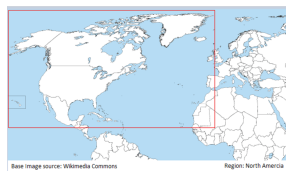

Region: 1 - North America, top_lat: 84, bottom_lat: 14, left_lon: 190, right_lon: 350

Dataset:
---------------
 dimensions:  Frozen({'time': 365, 'lat': 284, 'lon': 644}) 
 coordinates:  Coordinates:
  * time     (time) object 2020-01-01 12:00:00 ... 2020-12-31 12:00:00
  * lat      (lat) float64 14.12 14.38 14.62 14.88 ... 84.12 84.38 84.62 84.88
  * lon      (lon) float64 190.1 190.4 190.6 190.9 ... 350.1 350.4 350.6 350.9 
 variables:  Data variables:
    tasmax           (time, lat, lon) float32 ...
    above_threshold  (time, lat, lon) float32 ...
    extreme_yn       (time, lat, lon) float64 ... 

Grid cells 
---------------
Grid cells for each day are: lat x lon (284 x 644) = 182,896

Note: for cmip 6, the temperature values are provided for only the grid cells covering the land area. 
...temperature values for the grid cells overlapping the sea are nan (not provided).


In [4]:
# user provided parameters:
ext_filename = 'Ext_max_t__Rgn_1__2020__Abv_Avg_4_K_for_3_days__CMIP6_GISS_E2_1_G_ssp245_Avg_yrs_1950_69.nc'
region_id = 1
area_of_interest = None   # provide id,or None

# code starts.
ds_ext = None

reg = Regions()
if area_of_interest is not None:    
    aoi = reg.get_area_of_interest_by_ID(area_of_interest)
    if aoi is not None:
        reg.show_areas_of_interest_by_aoi_ID(area_of_interest, figure_size=5)
        ds_ext = load_1_yr_results_and_basic_analysis(ext_filename, True, aoi)
    else:
        print('Specified area_of_interest ID, {}, does not exist'.format(area_of_interest))
else:
    ds_ext = load_1_yr_results_and_basic_analysis(ext_filename, True)
    reg.show_region_by_ID(ds_ext.attrs['region_id'], figure_size=5)    

print('\nDataset:\n{}\n'.format('-'*15),'dimensions: ', ds_ext.dims, '\n', 'coordinates: ', ds_ext.coords, '\n','variables: ', ds_ext.data_vars, '\n')

lat = ds_ext.dims['lat']
lon = ds_ext.dims['lon']

print('Grid cells \n{}'.format('-'*15))
print('Grid cells for each day are: lat x lon ({} x {}) = {:,d}'.format(lat, lon, (lat*lon)))
if ds_ext.attrs['cmip'] == 6:
    print('\nNote: for cmip 6, the temperature values are provided for only the grid cells covering the land area. \n...temperature values for the grid cells overlapping the sea are nan (not provided).')

## Visualizations

In [6]:
%%capture --no-display
#### interactive visual, will take some time to render...
pane = interactive_visual_region(ds_ext, 180, 185, 1, 'tasmax')
pane

Row
    [0] HoloViews(HoloMap)
    [1] Column
        [0] WidgetBox
            [0] DiscreteSlider(margin=(20, 20, 20, 20), name='time', options=OrderedDict([('2020-06-29 ...]), value=cftime.DatetimeNoLeap(2020..., width=250)
        [1] VSpacer()

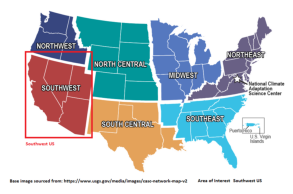

Area of Interest: 108 - Southwest US, top_lat: 42, bottom_lat: 32, left_lon: 235, right_lon: 251
Extreme Temperature Base Results for: 
region_id: 1; Analysis year: 2020; threshold: 4; based_on_averages: True; is_percentage: False; averages_start_year: 1950; averages_end_year: 1969; 
** from the filename:  Ext_max_t__Rgn_1__2020__Abv_Avg_4_K_for_3_days__CMIP6_GISS_E2_1_G_ssp245_Avg_yrs_1950_69.nc **

Dataset:
---------------
 dimensions:  Frozen({'time': 365, 'lat': 44, 'lon': 68}) 
 coordinates:  Coordinates:
  * time     (time) object 2020-01-01 12:00:00 ... 2020-12-31 12:00:00
  * lat      (lat) float64 32.12 32.38 32.62 32.88 ... 42.12 42.38 42.62 42.88
  * lon      (lon) float64 235.1 235.4 235.6 235.9 ... 251.1 251.4 251.6 251.9 
 variables:  Data variables:
    tasmax           (time, lat, lon) float32 ...
    above_threshold  (time, lat, lon) float32 ...
    extreme_yn       (time, lat, lon) float64 ... 

Grid cells 
---------------
Grid cells for each day are: lat x lon (44 x 

In [27]:
# user provided parameters:
ext_filename = 'Ext_max_t__Rgn_1__2020__Abv_Avg_4_K_for_3_days__CMIP6_GISS_E2_1_G_ssp245_Avg_yrs_1950_69.nc'
region_id = 1
area_of_interest = 108   # provide id,or None

# code starts.
ds_ext = None

reg = Regions()
if area_of_interest is not None:    
    aoi = reg.get_area_of_interest_by_ID(area_of_interest)
    if aoi is not None:
        reg.show_areas_of_interest_by_aoi_ID(area_of_interest, figure_size=5)
        ds_ext = load_1_yr_results_and_basic_analysis(ext_filename, True, aoi)
    else:
        print('Specified area_of_interest ID, {}, does not exist'.format(area_of_interest))
else:
    ds_ext = load_1_yr_results_and_basic_analysis(ext_filename, True)
    reg.show_region_by_ID(ds_ext.attrs['region_id'], figure_size=5)    

print('\nDataset:\n{}\n'.format('-'*15),'dimensions: ', ds_ext.dims, '\n', 'coordinates: ', ds_ext.coords, '\n','variables: ', ds_ext.data_vars, '\n')

lat = ds_ext.dims['lat']
lon = ds_ext.dims['lon']

print('Grid cells \n{}'.format('-'*15))
print('Grid cells for each day are: lat x lon ({} x {}) = {:,d}'.format(lat, lon, (lat*lon)))
if ds_ext.attrs['cmip'] == 6:
    print('\nNote: for cmip 6, the temperature values are provided for only the grid cells covering the land area. \n...temperature values for the grid cells overlapping the sea are nan (not provided).')